# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import sys


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Base.XsuitePlus as xPlus
import BBStudies.Base.InteractionPoint as inp

LINEFOLDER   = '../Data/Lines/'
SURVEYFOLDER = '../Data/Surveys/'
df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']


line_b4   = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_lhcb2.json')
xtwiss    = xt.Tracker(line=line_b4).twiss()
twiss_b4  = pd.DataFrame(xtwiss,columns = df_columns)
twiss_b4['name'] = twiss_b4['name'].apply(lambda line:str(line).replace('b2','b4'))
twiss_b4.set_index('name',inplace=True)

twiss_b2 = pd.read_pickle(f'../Data/Checks/lhcb2_opticsfile32_twiss.pkl')
twiss_b1 = pd.read_pickle(f'../Data/Checks/lhcb1_opticsfile32_twiss.pkl')


clear_output(wait=False)






--- 

In [14]:
twiss_b1 = pd.read_pickle(f'../Data/Checks/lhcb1_opticsfile32_twiss.pkl')

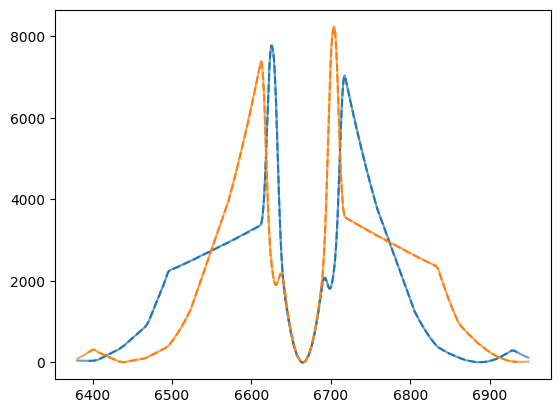

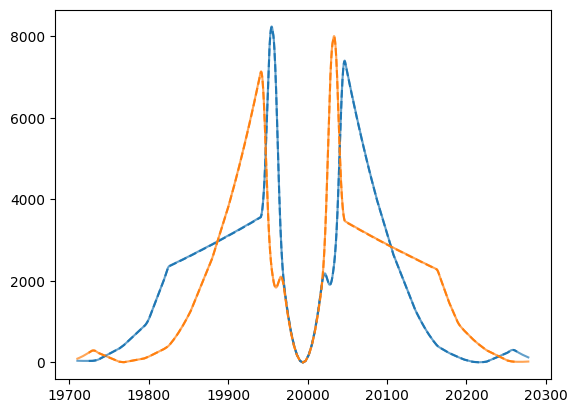

In [16]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b4'
    ROI_twiss_b4  = twiss_b4.loc[f'mb.a8r{_IP[-1]}.{beam}_dex':f'mb.a8l{_IP[-1]}.{beam}_den'].copy()

    beam='b2'
    ROI_twiss_b2  = twiss_b2.loc[f'mb.a8r{_IP[-1]}.{beam}_den':f'mb.a8l{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    
    plt.figure()
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.betx,color='C0',alpha=0.7)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.bety,color='C1',alpha=0.7)
    plt.plot(ROI_twiss_b4.s,ROI_twiss_b4.betx,color='C0',ls='--')
    plt.plot(ROI_twiss_b4.s,ROI_twiss_b4.bety,color='C1',ls='--')

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
mb.a8r5.b2_dex,mb.a8r5.b2_dex:1,dipedge,19724.426280,37.879632,-0.019763,46.765531,240.131885,-6.324768,45.264685,1.680678e-07,...,-1.052846e-10,0.006613,-3.668551e-08,1.250764e-09,-4.120171e-11,-5.228251e-09,-1.443606e-10,-3.668551e-08,1.056847e-08,0.0
drift_23031[0],drift_23031:0,drift,19724.760533,37.895794,-0.028590,46.766936,244.379097,-6.381842,45.264904,1.661730e-07,...,-1.052846e-10,0.006613,-3.668551e-08,1.236992e-09,-4.120171e-11,-5.276504e-09,-1.443606e-10,-3.668551e-08,1.056847e-08,0.0
mcd.8r5.b2,mcd.8r5.b2:1,multipole,19724.760533,37.895794,-0.028590,46.766936,244.379097,-6.381842,45.264904,1.661730e-07,...,-1.052846e-10,0.006613,-3.668551e-08,1.236992e-09,-4.120171e-11,-5.276504e-09,-1.443606e-10,-3.668551e-08,1.056847e-08,0.0
drift_23032[0],drift_23032:0,drift,19724.762033,37.895880,-0.028630,46.766942,244.398243,-6.382098,45.264905,1.661645e-07,...,-1.052846e-10,0.006613,-3.668551e-08,1.236930e-09,-4.120171e-11,-5.276720e-09,-1.443606e-10,-3.668551e-08,1.056847e-08,0.0
mco.8r5.b2,mco.8r5.b2:1,multipole,19724.762033,37.895880,-0.028630,46.766942,244.398243,-6.382098,45.264905,1.661645e-07,...,-1.052846e-10,0.006613,-3.668551e-08,1.236930e-09,-4.120171e-11,-5.276720e-09,-1.443606e-10,-3.668551e-08,1.056847e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e.ds.l5.b2,e.ds.l5.b2:1,marker,20262.914033,273.840523,5.953268,47.825046,17.290658,0.268588,46.360060,2.278197e-07,...,-1.785240e-10,0.006613,-3.668341e-08,1.787791e-09,-6.521486e-11,-1.401239e-09,4.699791e-11,-3.668341e-08,1.056847e-08,0.0
drift_24597[0],drift_24597:0,drift,20263.320033,269.028412,5.899240,47.825284,17.082786,0.243413,46.363820,2.243521e-07,...,-1.785240e-10,0.006613,-3.668341e-08,1.761314e-09,-6.521486e-11,-1.382158e-09,4.699791e-11,-3.668341e-08,1.056847e-08,0.0
mcs.a8l5.b2,mcs.a8l5.b2:1,multipole,20263.320033,269.028412,5.899240,47.825284,17.082786,0.243413,46.363820,2.243521e-07,...,-1.785240e-10,0.006613,-3.668341e-08,1.761314e-09,-6.521486e-11,-1.382158e-09,4.699791e-11,-3.668341e-08,1.056847e-08,0.0
drift_24598[0],drift_24598:0,drift,20263.594280,265.802723,5.862744,47.825447,16.953939,0.226408,46.366385,2.220098e-07,...,-1.785240e-10,0.006613,-3.668341e-08,1.743429e-09,-6.521486e-11,-1.369269e-09,4.699791e-11,-3.668341e-08,1.056847e-08,0.0


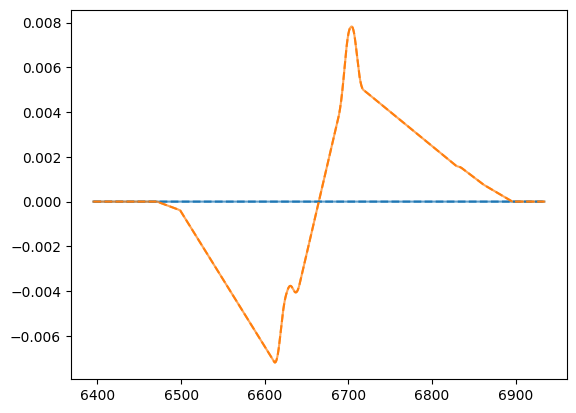

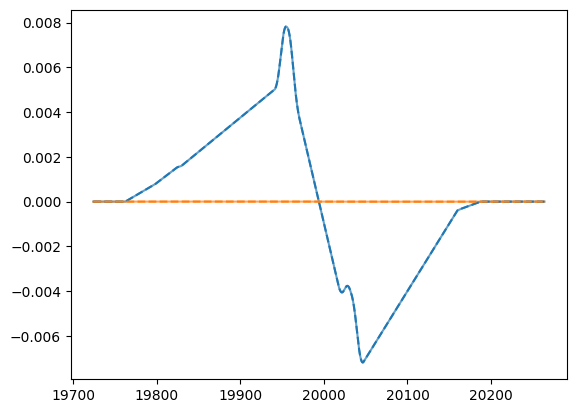

In [20]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b4'
    ROI_twiss_b4  = twiss_b4.loc[f'mb.a8r{_IP[-1]}.{beam}_dex':f'mb.a8l{_IP[-1]}.{beam}_den'].copy()

    beam='b2'
    ROI_twiss_b2  = twiss_b2.loc[f'mb.a8r{_IP[-1]}.{beam}_dex':f'mb.a8l{_IP[-1]}.{beam}_den']



    # Plotting
    
    plt.figure()
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.x,color='C0',alpha=0.7)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.y,color='C1',alpha=0.7)
    plt.plot(ROI_twiss_b4.s,ROI_twiss_b4.x,color='C0',ls='--')
    plt.plot(ROI_twiss_b4.s,ROI_twiss_b4.y,color='C1',ls='--')

In [6]:
ROI_twiss_b4

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mb.a8r5.b4_dex,19724.426280,1.679344e-07,-5.677033e-09,-7.121940e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.790007,239.582386,...,-0.003895,-0.494140,-0.013646,46.765533,45.264689,62.301068,60.311907,0.001867,13.697427,8.546989
drift_23031,19724.426280,1.679344e-07,-5.677033e-09,-7.121940e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.790007,239.582386,...,-0.003895,-0.494140,-0.013646,46.765533,45.264689,62.301068,60.311907,0.001867,13.697427,8.546989
mcd.8r5.b4,19724.760533,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806120,243.819796,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697427,8.546989
drift_23032,19724.760533,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806120,243.819796,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697427,8.546989
mco.8r5.b4,19724.762033,1.660283e-07,-5.677033e-09,-7.188368e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806206,243.838898,...,-0.003895,-0.498722,-0.013646,46.766943,45.264910,62.301068,60.311907,0.001867,13.697427,8.546989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e.ds.l5.b4,20262.914033,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202729,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697427,8.546989
drift_24597,20262.914033,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202729,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697427,8.546989
mcs.a8l5.b4,20263.320033,2.237025e-07,-8.529285e-09,-1.882401e-07,6.662967e-09,0.000002,0.000001,0.000001,268.401820,17.041590,...,-0.006150,-0.130719,0.004436,47.825287,46.363830,62.301068,60.311907,0.001867,13.697427,8.546989


In [5]:
ROI_twiss_b2

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
mb.a8r5.b2_den,mb.a8r5.b2_den:1,dipedge,19710.126280,42.713907,0.357821,46.707686,94.160489,-3.883036,45.249526,1.962226e-07,...,-1.052018e-10,0.006613,-3.669274e-08,1.454551e-09,1.269995e-11,-3.163900e-09,-1.443606e-10,-3.669274e-08,1.056847e-08,0.0
drift_23027[0],drift_23027:0,drift,19712.509613,41.158305,0.294880,46.716737,113.639511,-4.289992,45.253194,2.003479e-07,...,-1.052018e-10,0.006613,-3.669274e-08,1.484820e-09,1.269995e-11,-3.507959e-09,-1.443606e-10,-3.669274e-08,1.056847e-08,0.0
mb.a8r5.b2..1,mb.a8r5.b2..1:1,multipole,19712.509613,41.158305,0.294917,46.716737,113.639511,-4.289992,45.253194,2.003479e-07,...,-1.052457e-10,0.006613,-3.668895e-08,1.484820e-09,-1.425094e-11,-3.507959e-09,-1.443606e-10,-3.668895e-08,1.056847e-08,0.0
drift_23028[0],drift_23028:0,drift,19717.276280,38.946819,0.169031,46.735731,158.417008,-5.103902,45.258849,1.909629e-07,...,-1.052457e-10,0.006613,-3.668895e-08,1.416890e-09,-1.425094e-11,-4.196076e-09,-1.443606e-10,-3.668895e-08,1.056847e-08,0.0
mb.a8r5.b2,mb.a8r5.b2:1,marker,19717.276280,38.946819,0.169031,46.735731,158.417008,-5.103902,45.258849,1.909629e-07,...,-1.052457e-10,0.006613,-3.668895e-08,1.416890e-09,-1.425094e-11,-4.196076e-09,-1.443606e-10,-3.668895e-08,1.056847e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mb.a8l5.b2,mb.a8l5.b2:1,marker,20270.744280,188.766881,4.911426,47.830528,16.886247,-0.216940,46.435822,1.433067e-07,...,-1.785161e-10,0.006613,-3.667936e-08,1.148678e-09,-9.216585e-11,-1.033235e-09,4.699791e-11,-3.667936e-08,1.056847e-08,0.0
drift_24601[0],drift_24601:0,drift,20275.510947,144.968522,4.277054,47.835115,20.363271,-0.512506,46.477197,8.495955e-08,...,-1.785161e-10,0.006613,-3.667936e-08,7.093555e-10,-9.216585e-11,-8.092118e-10,4.699791e-11,-3.667936e-08,1.056847e-08,0.0
mb.a8l5.b2..2,mb.a8l5.b2..2:1,multipole,20275.510947,144.968522,4.277186,47.835115,20.363271,-0.512506,46.477197,8.495955e-08,...,-1.785161e-10,0.006613,-3.667755e-08,7.093555e-10,-1.191160e-10,-8.092118e-10,4.699791e-11,-3.667755e-08,1.056847e-08,0.0
drift_24602[0],drift_24602:0,drift,20277.894280,125.336637,3.959981,47.837929,23.158428,-0.660289,46.494700,4.696842e-08,...,-1.785161e-10,0.006613,-3.667755e-08,4.254631e-10,-1.191160e-10,-6.972005e-10,4.699791e-11,-3.667755e-08,1.056847e-08,0.0


In [15]:
twiss_b1

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
ip3,ip3:1,marker,0.0000,128.396585,2.471458,0.000000,210.109729,-2.527153,0.000000,6.337180e-07,...,-6.550010e-12,0.006613,3.696592e-08,4.516561e-09,8.330140e-11,-5.107499e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0
drift_0[0],drift_0:0,drift,21.0300,48.930935,1.307228,0.042739,331.949481,-3.266471,0.012687,8.681388e-07,...,-6.550032e-12,0.006613,3.696592e-08,6.268385e-09,8.330140e-11,-6.399518e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0
mcbwv.4l3.b2,mcbwv.4l3.b2:1,vkicker,21.0300,48.930935,1.307228,0.042739,331.949481,-3.266471,0.012687,8.681388e-07,...,-6.550032e-12,0.006613,3.696592e-08,6.268385e-09,8.330140e-11,-6.399518e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0
drift_1[0],drift_1:0,drift,22.5205,45.157083,1.224713,0.047786,341.764919,-3.318871,0.013391,8.847533e-07,...,-6.550034e-12,0.006613,3.696592e-08,6.392545e-09,8.330140e-11,-6.491089e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0
bpmw.4l3.b2,bpmw.4l3.b2:1,monitor,22.5205,45.157083,1.224713,0.047786,341.764919,-3.318871,0.013391,8.847533e-07,...,-6.550034e-12,0.006613,3.696592e-08,6.392545e-09,8.330140e-11,-6.491089e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4r3.b2,bpmw.4r3.b2:1,monitor,26636.4387,267.225698,3.713995,62.281733,114.378217,-1.738108,60.288777,3.822077e-07,...,-6.549964e-12,0.006613,3.696591e-08,2.646908e-09,8.330140e-11,-3.728577e-09,-6.143713e-11,3.696591e-08,1.056847e-08,0.0
drift_30876[0],drift_30876:0,drift,26640.1832,240.187856,3.506697,62.284085,127.887810,-1.869747,60.293706,4.240058e-07,...,-6.549967e-12,0.006613,3.696591e-08,2.958829e-09,8.330140e-11,-3.958627e-09,-6.143713e-11,3.696591e-08,1.056847e-08,0.0
mcbwh.4r3.b2,mcbwh.4r3.b2:1,hkicker,26640.1832,240.187856,3.506697,62.284085,127.887810,-1.869747,60.293706,4.240058e-07,...,-6.549967e-12,0.006613,3.696591e-08,2.958829e-09,8.330140e-11,-3.958627e-09,-6.143713e-11,3.696591e-08,1.056847e-08,0.0
drift_30877[0],drift_30877:0,drift,26658.8832,128.396531,2.471457,62.301065,210.109729,-2.527153,60.311901,6.327453e-07,...,-6.549987e-12,0.006613,3.696592e-08,4.516561e-09,8.330140e-11,-5.107499e-09,-6.143713e-11,3.696592e-08,1.056847e-08,0.0


In [12]:
beam='b1'
ROI_twiss_b1  = twiss_b1.loc[f'mb.a8l{_IP[-1]}.{beam}_dex':f'mb.a8r{_IP[-1]}.{beam}_den'].copy()
ROI_twiss_b1

KeyError: 'mb.a8l5.b1_dex'

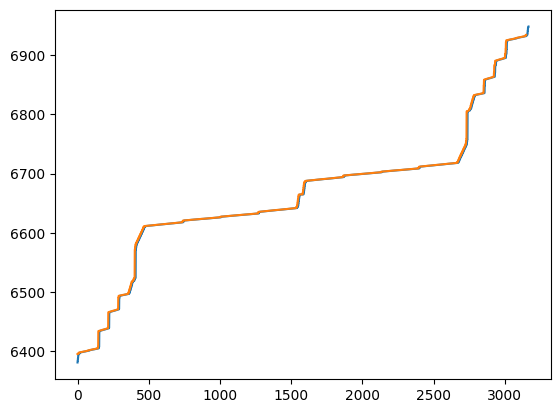

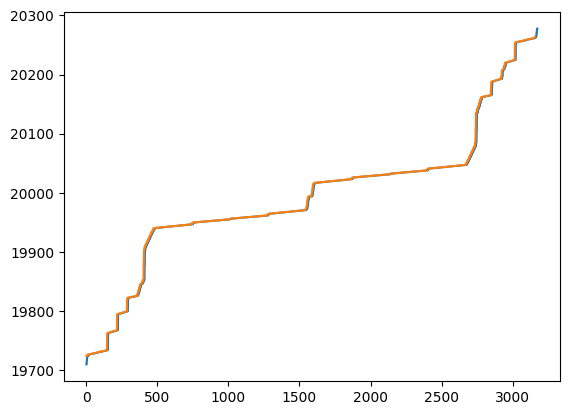

In [4]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b4'
    ROI_twiss_b4  = twiss_b4.loc[f'mb.a8r{_IP[-1]}.{beam}_dex':f'mb.a8l{_IP[-1]}.{beam}_den'].copy()

    beam='b2'
    ROI_twiss_b2  = twiss_b2.loc[f'mb.a8r{_IP[-1]}.{beam}_den':f'mb.a8l{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    
    plt.figure()
    plt.plot(ROI_twiss_b2.reset_index().index,ROI_twiss_b2.s)
    plt.plot(ROI_twiss_b4.reset_index().index,ROI_twiss_b4.s)